## Introduction

Our company is entering the film industry by launching a new movie studio but lacks experience in film production. We are tasked with analyzing current box office trends to identify successful film types. The goal is to translate these insights into actionable recommendations that will guide the studio head in creating films that align with market preferences and drive success.

## Problem Statement
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Objectives
1. Evaluate the performance of various film genres in both domestic and international markets.
2. Identify the movie studios that consistently produce high-performing films.
3. Investigate the correlation between production budgets and both domestic and international revenues.
4. Examine trends in film production over time.
5. Assess the impact of a film's popularity score and average rating on its overall performance.

## Data
Datasets used were obtained from:
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)


## Exploratory Data Analysis

In [1]:
#Import the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.formula.api import ols
%matplotlib inline

#### Loading the data

In [2]:
# Load the movie gross data
movie_gross=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\bom.movie_gross.csv.gz', compression='gzip')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# Load the movie data
movie_data=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\tmdb.movies.csv.gz', compression='gzip')
movie_data.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
# Load the movie budget data
movie_budget=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\tn.movie_budgets.csv.gz', compression='gzip')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
# Load the movie info data
movie_info=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\rt.movie_info.tsv.gz', sep='\t', compression='gzip')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
# Load the reviews data
reviews=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\rt.reviews.tsv.gz', sep='\t',encoding='ISO-8859-1', compression='gzip')
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [6]:
# Load the database
# Create a connection
conn=sqlite3.connect('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\im.db')

In [7]:
# Create a cursor
cursor=conn.cursor()

In [8]:
cursor.execute("SELECT * FROM sqlite_master;")
print(cursor.fetchall())

[('table', 'movie_basics', 'movie_basics', 2, 'CREATE TABLE "movie_basics" (\n"movie_id" TEXT,\n  "primary_title" TEXT,\n  "original_title" TEXT,\n  "start_year" INTEGER,\n  "runtime_minutes" REAL,\n  "genres" TEXT\n)'), ('table', 'directors', 'directors', 3, 'CREATE TABLE "directors" (\n"movie_id" TEXT,\n  "person_id" TEXT\n)'), ('table', 'known_for', 'known_for', 4, 'CREATE TABLE "known_for" (\n"person_id" TEXT,\n  "movie_id" TEXT\n)'), ('table', 'movie_akas', 'movie_akas', 5, 'CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\n  "ordering" INTEGER,\n  "title" TEXT,\n  "region" TEXT,\n  "language" TEXT,\n  "types" TEXT,\n  "attributes" TEXT,\n  "is_original_title" REAL\n)'), ('table', 'movie_ratings', 'movie_ratings', 6, 'CREATE TABLE "movie_ratings" (\n"movie_id" TEXT,\n  "averagerating" REAL,\n  "numvotes" INTEGER\n)'), ('table', 'persons', 'persons', 7, 'CREATE TABLE "persons" (\n"person_id" TEXT,\n  "primary_name" TEXT,\n  "birth_year" REAL,\n  "death_year" REAL,\n  "primary_professi

In [9]:
# Check the tables within our database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables=cursor.fetchall()

for table in tables:
    print(table[0])



movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [12]:
movie_basics=pd.read_sql("""SELECT *
            FROM movie_basics
            ;""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [13]:
movie_akas=pd.read_sql("""SELECT *
            FROM movie_akas
            ;""", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [14]:
# Movie ratings
movie_ratings=pd.read_sql("""SELECT *
            FROM movie_ratings
            ;""", conn)

movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## Data Description

**Movie_gross**

In [15]:
# Data overview
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
# movie_gross descriptive statistics
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


**Movie Data**

In [17]:
# Data overview
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [18]:
# movie_data descriptive statistics
movie_data.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


**Movie_budget**

In [19]:
# Data overview
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Cleaning

**Movie_gross data**

In [20]:
# Check for total missing values
movie_gross.isna().sum().sort_values()

title                0
year                 0
studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64

> The movie gross data has some missing values in the columns; studio, domestic_gross and foreign_gross

In [21]:
# Filling the missing values with 0
movie_gross['domestic_gross'].fillna(0)
movie_gross['foreign_gross'].fillna(0)

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object

In [22]:
# Checking for total duplicates
movie_gross.duplicated().sum()


0

> The movie gross data has no duplicates.

**movie_data**

In [23]:
# Check for missing values
movie_data.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [24]:
# Check for duplicates
movie_data.duplicated().sum()

0

In [25]:
# Drop unnecessary columns
movie_data.drop(columns=['original_language'])


,Unnamed: 0,genre_ids,id,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


**Movie_budget data**

In [26]:
# Check for missing values
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [27]:
# Check for duplicates
movie_budget.duplicated().sum()

0

> The movie_budget data has no missing data. The data has no duplicates

In [28]:
# Remove the $ in the production_budget, domestic_gross and worldwide gross columns
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '')
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [29]:
# Get rid of the commas
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace(',', '')
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace(',', '')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace(',', '')
movie_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [30]:
# Convert the values from str to float
movie_budget['production_budget'] = movie_budget['production_budget'].astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].astype(float)

movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [31]:
# convert  release_date to date time object 
movie_budget['release_date'] =  pd.to_datetime(movie_budget['release_date'])
movie_budget.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


**Movie_basics**

In [32]:
# Check for missing values
movie_basics.isna().sum().sort_values()

movie_id               0
primary_title          0
start_year             0
original_title        21
genres              5408
runtime_minutes    31739
dtype: int64

In [33]:
# Check for duplicates
movie_basics.duplicated().sum()

0

**movie_akas**

In [34]:
# Check for missing values
movie_akas.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [35]:
# Drop unnecessary columns
movie_akas.drop(columns=['types', 'language', 'attributes', 'is_original_title','ordering'])

,movie_id,title,region
0,tt0369610,Джурасик свят,BG
1,tt0369610,Jurashikku warudo,JP
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR
3,tt0369610,O Mundo dos Dinossauros,BR
4,tt0369610,Jurassic World,FR
...,...,...,...
331698,tt9827784,Sayonara kuchibiru,None
331699,tt9827784,Farewell Song,XWW
331700,tt9880178,La atención,None
331701,tt9880178,La atención,ES


In [36]:
# Check for duplicates
movie_akas.duplicated().sum()

0

**movie_ratings**

In [37]:
# Check for missing values
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [38]:
# Check for duplicates
movie_akas.duplicated().sum()

0

> Movie_ratings has no duplicates. There are no missing values

#### Data Merging

> The bom.movie_gross.csv (movie_gross) and tmdb.movies.csv(movie_data) were merged using the title column. 

In [39]:
# Clean the title columns in both data
# Remove unwanted characters (e.g., punctuation) and convert to title case in the movie_gross
movie_gross['title'] = movie_gross['title'].str.replace(r'[^\w\s]', '', regex=True)  # Remove non-word characters
movie_gross['title'] = movie_gross['title'].str.title()  # Convert to title case

# Remove unwanted characters (e.g., punctuation) and convert to title case in the movie_data
movie_data['title'] = movie_data['title'].str.replace(r'[^\w\s]', '', regex=True)  # Remove non-word characters
movie_data['title'] = movie_data['title'].str.title()  # Convert to title case

# Merge the movie_gross data and movie_data
movies_gross_data=movie_gross.merge(movie_data, how='inner', on='title')

# Merge the movie_gross_data and movie_budget dataframes
# Rename the movie column in movie_budget df to align with title column in movies-gross_data
movie_budget=movie_budget.rename(columns={'movie':'title'})

# Merge 
movies_merge=movies_gross_data.merge(movie_budget, how='inner', on='title')
movies_merge

,title,studio,domestic_gross_x,foreign_gross,year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,47,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,38,2010-07-16,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,27,2010-05-21,165000000.0,238736787.0,7.562447e+08
3,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,15,2010-05-07,170000000.0,312433331.0,6.211564e+08
4,Tangled,BV,200800000.0,391000000,2010,13,"[16, 10751]",38757,en,Tangled,21.511,2010-11-24,7.5,6407,15,2010-11-24,260000000.0,200821936.0,5.864772e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,The Hurricane Heist,ENTMP,6100000.0,NaN,2018,24023,"[28, 80, 53]",430040,en,The Hurricane Heist,13.335,2018-03-09,5.4,476,22,2018-03-09,40000000.0,6115824.0,3.096368e+07
1035,Destroyer,Annapurna,1500000.0,4000000,2018,23921,"[53, 80, 18, 28]",471507,en,Destroyer,17.815,2018-12-25,5.9,176,5,2018-12-25,9000000.0,1533324.0,3.681096e+06
1036,Gotti,VE,4300000.0,NaN,2018,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,5.2,231,64,2018-06-15,10000000.0,4286367.0,6.089100e+06
1037,Mandy,RLJ,1200000.0,NaN,2018,20499,[18],499658,en,Mandy,0.600,2016-01-24,3.5,2,71,2018-09-14,6000000.0,1214525.0,1.427656e+06


> Three tables from data obtained from the im.db database were also merged using the movie_id column

In [40]:
# Merge the movie_basics, movie_ratings and the movie_akas tables
movies=pd.read_sql("""SELECT *
                   FROM movie_basics
                   JOIN movie_akas USING (movie_id)
                   JOIN movie_ratings USING (movie_id)
                   ;""", conn)
movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,None,alternative transliteration,0.0,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",2,Sunghursh,None,None,original,None,1.0,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3,Sunghursh,IN,None,None,None,0.0,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4,Sunghursh,IN,hi,None,alternative transliteration,0.0,7.0,77
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",5,Sungharsh,IN,hi,None,alternative spelling,0.0,7.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,2,Sisterleaf,IN,en,None,literal English title,0.0,8.4,600
261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,3,Pengalila,IN,None,None,None,0.0,8.4,600
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0,8.4,365
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,2,Pathmavyuhathile Abhimanyu,IN,ml,None,alternative spelling,0.0,8.4,365


> The two different merged datas were then merged to form one common dataframe. The title column was used to merge.

In [41]:
all_movies=movies.merge(movies_merge, how='inner', on='title')
all_movies

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,ordering,title,region,language,...,original_title_y,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,1,Whiplash,US,None,...,Whiplash,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0
1,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,1,Whiplash,US,None,...,Whiplash,28.784,2014-10-10,8.4,7908,43,2014-10-10,3300000.0,13092006.0,38969037.0
2,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",3,Whiplash,IL,he,...,Whiplash,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0
3,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",3,Whiplash,IL,he,...,Whiplash,28.784,2014-10-10,8.4,7908,43,2014-10-10,3300000.0,13092006.0,38969037.0
4,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",4,Whiplash,DE,None,...,Whiplash,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,tt7690670,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",7,Superfly,CA,fr,...,SuperFly,12.046,2018-06-13,6.5,130,49,2018-06-13,16000000.0,20537137.0,20723581.0
6161,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",2,Hereditary,ES,None,...,Hereditary,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0
6162,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",8,Hereditary,None,None,...,Hereditary,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0
6163,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",9,Hereditary,US,None,...,Hereditary,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0


> Unwanted columns were dropped from the common dataframe. This was on the basis that they were not to be used for the analysis

In [42]:
# Columns to drop
columns_to_drop = [col for col in ['ordering','domestic_gross_x', 'original_title_x','types','region', 'attributes','is_original_title', 'is_original_language', 'language', 'original_title_y', 'original_language'] if col in all_movies.columns]

# Drop the columns
all_movies.drop(columns=columns_to_drop, inplace=True)
all_movies

,movie_id,primary_title,start_year,runtime_minutes,genres,title,averagerating,numvotes,studio,foreign_gross,...,id_x,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,tt0339736,The Evil Within,2017,98.0,Horror,Whiplash,5.6,2420,SPC,35900000,...,367412,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0
1,tt0339736,The Evil Within,2017,98.0,Horror,Whiplash,5.6,2420,SPC,35900000,...,244786,28.784,2014-10-10,8.4,7908,43,2014-10-10,3300000.0,13092006.0,38969037.0
2,tt2582802,Whiplash,2014,106.0,"Drama,Music",Whiplash,8.5,616916,SPC,35900000,...,367412,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0
3,tt2582802,Whiplash,2014,106.0,"Drama,Music",Whiplash,8.5,616916,SPC,35900000,...,244786,28.784,2014-10-10,8.4,7908,43,2014-10-10,3300000.0,13092006.0,38969037.0
4,tt2582802,Whiplash,2014,106.0,"Drama,Music",Whiplash,8.5,616916,SPC,35900000,...,367412,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,tt7690670,SuperFly,2018,116.0,"Action,Crime,Thriller",Superfly,5.0,4753,Sony,236000,...,500475,12.046,2018-06-13,6.5,130,49,2018-06-13,16000000.0,20537137.0,20723581.0
6161,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,35300000,...,493922,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0
6162,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,35300000,...,493922,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0
6163,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,35300000,...,493922,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0


#### Analysis

**Objective 1: Evaluate the performance of various film genres in both domestic and international markets.**
> This is based on the profits(worldwide_gross + domestic_gross_x)-(production_budget)


In [43]:
# Creating a Profits column
all_movies['Profits']=(all_movies['worldwide_gross'] + all_movies['domestic_gross_y'])-all_movies['production_budget']
all_movies

,movie_id,primary_title,start_year,runtime_minutes,genres,title,averagerating,numvotes,studio,foreign_gross,...,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross,Profits
0,tt0339736,The Evil Within,2017,98.0,Horror,Whiplash,5.6,2420,SPC,35900000,...,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0,48761043.0
1,tt0339736,The Evil Within,2017,98.0,Horror,Whiplash,5.6,2420,SPC,35900000,...,28.784,2014-10-10,8.4,7908,43,2014-10-10,3300000.0,13092006.0,38969037.0,48761043.0
2,tt2582802,Whiplash,2014,106.0,"Drama,Music",Whiplash,8.5,616916,SPC,35900000,...,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0,48761043.0
3,tt2582802,Whiplash,2014,106.0,"Drama,Music",Whiplash,8.5,616916,SPC,35900000,...,28.784,2014-10-10,8.4,7908,43,2014-10-10,3300000.0,13092006.0,38969037.0,48761043.0
4,tt2582802,Whiplash,2014,106.0,"Drama,Music",Whiplash,8.5,616916,SPC,35900000,...,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0,48761043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,tt7690670,SuperFly,2018,116.0,"Action,Crime,Thriller",Superfly,5.0,4753,Sony,236000,...,12.046,2018-06-13,6.5,130,49,2018-06-13,16000000.0,20537137.0,20723581.0,25260718.0
6161,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,35300000,...,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0,104203361.0
6162,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,35300000,...,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0,104203361.0
6163,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,35300000,...,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0,104203361.0


In [44]:
# Splitting the genre values inorder to have one value for each entry
all_movies['genre_1']=all_movies['genres'].str.split(',').str[0]

# Total profits for each genre
top_genre =all_movies.groupby('genre_1')['Profits'].sum().sort_values(ascending=False)
print(top_genre)

genre_1
Action         6.048274e+11
Adventure      2.583254e+11
Drama          9.729264e+10
Comedy         9.616658e+10
Horror         7.881019e+10
Biography      7.700102e+10
Crime          2.627277e+10
Animation      1.759839e+10
Mystery        1.046275e+10
Documentary    8.081358e+09
Fantasy        6.120766e+09
Family         4.176832e+09
Sci-Fi         2.167394e+09
Thriller       2.001853e+09
Romance        1.275472e+09
Musical        1.287250e+07
Name: Profits, dtype: float64


Text(0.5, 1.0, 'Top Genres by Profits')

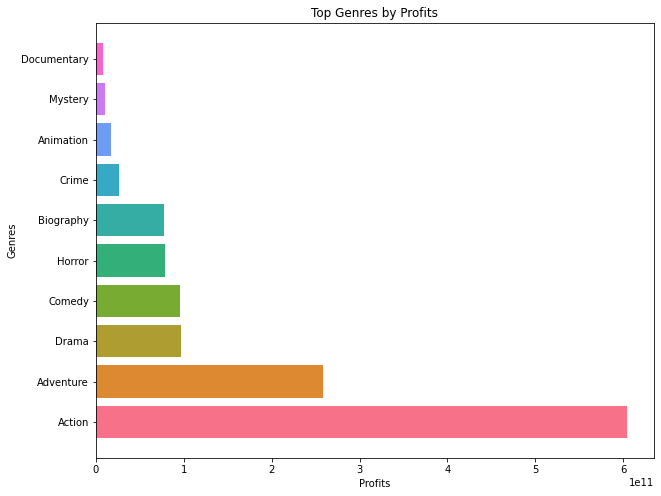

In [45]:
# Write the top_genre series into a DataFrame
top_genre_df=top_genre.reset_index().head(10)

# Plot the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Colors for each genre
colors = sns.color_palette("husl", len(top_genre_df))

# PLot the bar graph
ax.barh(top_genre_df['genre_1'], top_genre_df['Profits'], color=colors)

# Add labels and title
ax.set_xlabel('Profits')
ax.set_ylabel('Genres')
ax.set_title('Top Genres by Profits')

**Observation**
> Action genre had the highest profits

**Objective 2: Identify the movie studios that consistently produce high-performing films**
> This is based on the profits made

In [46]:
# Calculate total profits for each studio
studio_profits=all_movies.groupby('studio')['Profits'].sum().sort_values(ascending=False)
studio_profits
high_performance_threshold = 100_000_000  # e.g., films with over $100 million gross
high_performing_films = all_movies[
    (all_movies['domestic_gross_y'] >= high_performance_threshold) | 
    (all_movies['worldwide_gross'] >= high_performance_threshold)]

studio_performance = high_performing_films.groupby('studio').size().reset_index(name='high_performing_count')

consistent_studios = studio_performance[studio_performance['high_performing_count'] >= 5].sort_values(by='high_performing_count', ascending=False)
consistent_studios

,studio,high_performing_count
22,Uni.,516
24,WB,389
0,BV,325
6,Fox,321
18,Sony,318
13,Par.,276
25,WB (NL),104
9,LG/S,68
26,Wein.,43
10,LGF,39


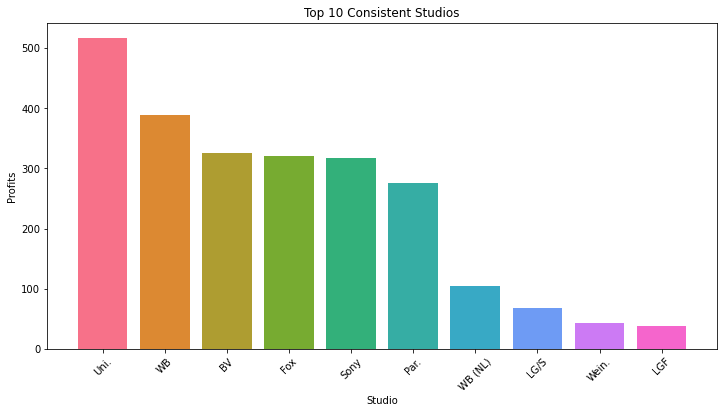

In [47]:
consistent_studios_df=consistent_studios.reset_index(drop=False).head(10)
#studio_foreign=studio_foreign_gross.reset_index().head(10)


# Plot figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the bar graph
ax1.bar(consistent_studios_df['studio'], consistent_studios_df['high_performing_count'], color=colors)


# Add labels and title for ax1
ax1.set_xlabel('Studio')
ax1.set_ylabel('Profits')
ax1.set_title('Top 10 Consistent Studios')
ax1.tick_params(axis='x', rotation=45)


**Observation**
> The bar plot shows the top 10 most successful consistent studios in terms of profit.
Uni is the most consistent followed by WB and BV. LGF is the least consistent in the top 10 list

**Objective 3: Examine trends in film production over time.**

In [48]:
# Create a new column (Year)
all_movies['release_year']=all_movies['release_date_y'].dt.year
movies_per_year= all_movies['release_year'].value_counts().sort_values()
movies_per_year

2005      2
2006      5
1984      5
1999      7
1967      8
2003      8
2001     18
1986     35
2014    517
2012    568
2018    589
2013    633
2017    638
2011    663
2010    724
2016    872
2015    873
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Number of Movies per Year')

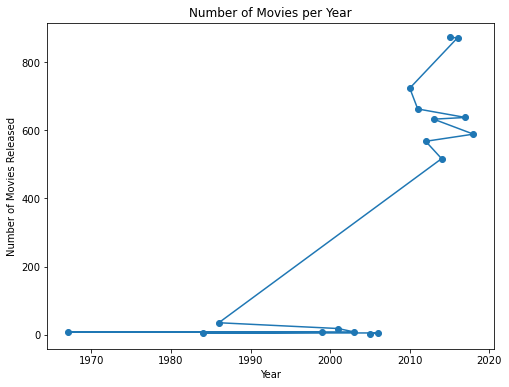

In [49]:
# Plot figure,axes
fig, ax=plt.subplots(figsize=(8,6))

ax.plot(movies_per_year.index, movies_per_year.values, marker='o')
#Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies Released')
ax.set_title('Number of Movies per Year')


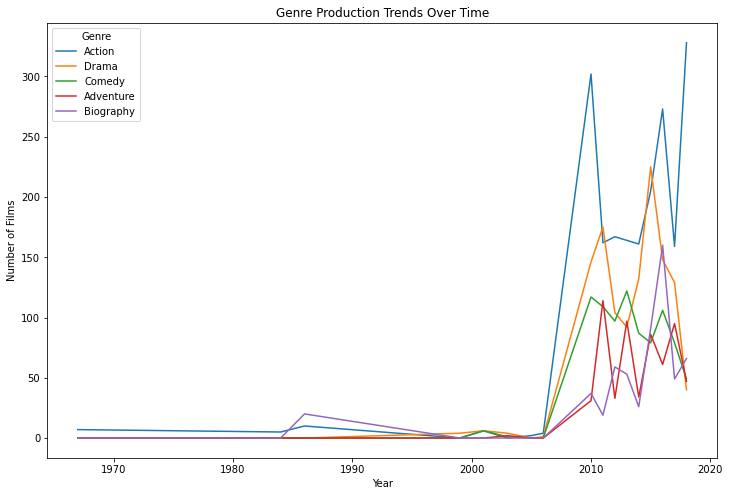

In [50]:
# Extract top genres
top_genres = all_movies['genre_1'].value_counts().head(5).index  # Choose top 5 genres for simplicity

# Filter for top genres and calculate production per year
genre_production_over_time = (
    all_movies[all_movies['genre_1'].isin(top_genres)]
    .groupby(['release_year', 'genre_1']).size()
    .unstack(fill_value=0)  # Each genre as a separate column
)

# Plot genre trends
plt.figure(figsize=(12, 8))
for genre in top_genres:
    plt.plot(genre_production_over_time.index, genre_production_over_time[genre], label=genre)

plt.title("Genre Production Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.legend(title="Genre")
plt.show()


**Observation**
> The plot shows a trend with a ow production from 1967 to 2006 , followed by a sharp and sudden increase leading to a cluster of points that then start to spread and fluctuate more

**Objective 4: Investigate the correlation between production budgets and both domestic and international revenues.**

Text(0.5, 1.0, 'Production_budget against Worldwide_gross')

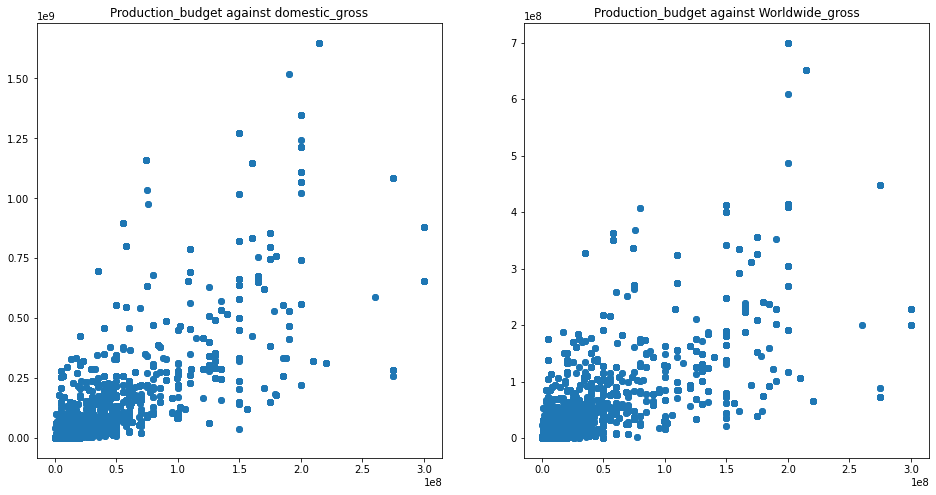

In [74]:
# Plot the figure and axes
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(16,8))

# Scatterplot of production_budget vs worldwide_gross
ax1.scatter(x=all_movies['production_budget'], y=all_movies['worldwide_gross'])

# Scatterplot of production_budget vs domestic_gross
ax2.scatter(x=all_movies['production_budget'], y=all_movies['domestic_gross_y'])

# Title
ax1.set_title('Production_budget against domestic_gross')
ax2.set_title('Production_budget against Worldwide_gross')


**Observation**
> There is a positive correlation between the production budget and both domestic and worldwide gross. This means that the higher the production budget, the higher the returns

In [75]:
# Select columns to use
selected_columns = all_movies[['production_budget', 'domestic_gross_y', 'worldwide_gross']]
# Create a correlation matrix
correlation_matrix = selected_columns.corr()
print(correlation_matrix)

                   production_budget  domestic_gross_y  worldwide_gross
production_budget           1.000000          0.643050         0.724013
domestic_gross_y            0.643050          1.000000         0.947495
worldwide_gross             0.724013          0.947495         1.000000


Text(0.5, 1.0, 'Correlation Matrix for Movie Data')

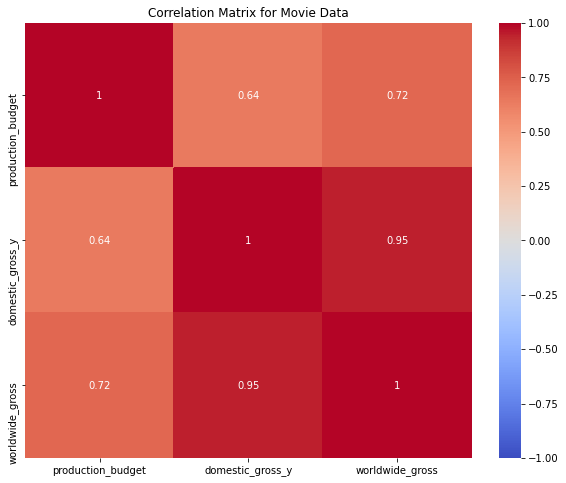

In [53]:
# Plot the figure, axes
fig, ax=plt.subplots(figsize=(10, 8))
#Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
# Title
plt.title("Correlation Matrix for Movie Data")


**Observation**
> The heatmap shows a positive correlation among the three values. This means that the higher the production budget, the higher the return in investment

**Objective 5: Assess the impact of a film's popularity score and average rating on its overall performance.**

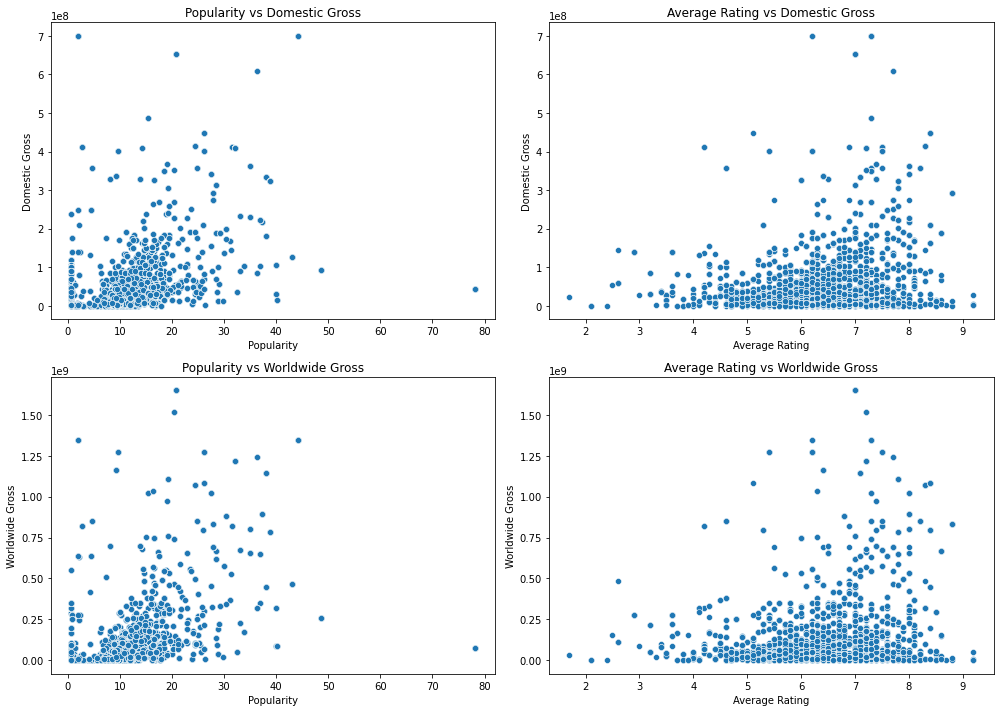

In [54]:
# 'popularity', 'average_rating', 'domestic_gross', 'worldwide_gross'

# Set up the figure and axes for 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot of Popularity vs Domestic Gross
sns.scatterplot( data=all_movies, x='popularity', y='domestic_gross_y', ax=axes[0, 0])
axes[0, 0].set_title('Popularity vs Domestic Gross')
axes[0, 0].set_xlabel('Popularity')
axes[0, 0].set_ylabel('Domestic Gross')

# Scatter plot of Average Rating vs Domestic Gross
sns.scatterplot(data=all_movies, x='averagerating', y='domestic_gross_y', ax=axes[0, 1])
axes[0, 1].set_title('Average Rating vs Domestic Gross')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_ylabel('Domestic Gross')

# Scatter plot of Popularity vs Worldwide Gross
sns.scatterplot(data=all_movies, x='popularity', y='worldwide_gross', ax=axes[1, 0])
axes[1, 0].set_title('Popularity vs Worldwide Gross')
axes[1, 0].set_xlabel('Popularity')
axes[1, 0].set_ylabel('Worldwide Gross')

# Scatter plot of Average Rating vs Worldwide Gross
sns.scatterplot(data=all_movies, x='averagerating', y='worldwide_gross', ax=axes[1, 1])
axes[1, 1].set_title('Average Rating vs Worldwide Gross')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Worldwide Gross')

# Adjust the layout so labels don't overlap
plt.tight_layout()

In [55]:
# Selecting the required columns
popularity_rating=all_movies[['popularity','averagerating', 'domestic_gross_y', 'worldwide_gross']]

In [56]:
# Calculate the correlation matrix 
correlation1=popularity_rating.corr()
correlation1

,popularity,averagerating,domestic_gross_y,worldwide_gross
popularity,1.000000,0.246375,0.408074,0.455894
averagerating,0.246375,1.000000,0.245441,0.242584
domestic_gross_y,0.408074,0.245441,1.000000,0.947495
worldwide_gross,0.455894,0.242584,0.947495,1.000000


<AxesSubplot:>

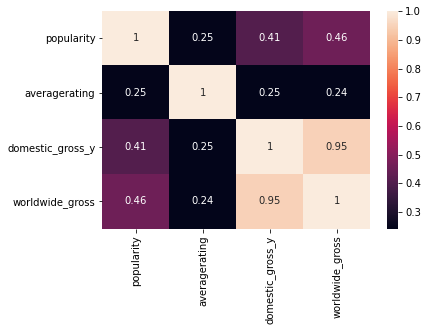

In [57]:
# Plot a heatmap of the correlation
sns.heatmap(correlation1, annot=True)

**Observation**
> There is a moderate positive correlation between the production budget and both domestic and worldwide gross. This means that the higher the production budget, the higher the returns. The correlation between average rating and both gross earnings (domestic and worldwide) is weak, which suggests that ratings do not strongly predict earnings.

## Statistical Analysis

**Evaluate the performance of various film genres in both domestic and international markets.**

>Null Hypothesis (H₀): There is no difference in the performance (domestic and international gross) across different genres.
>Alternative Hypothesis (H₁): There is a significant difference in the performance (domestic and international gross) across different genres.

In [58]:
# calculate descriptive statistics for each genre
genre_stats = all_movies.groupby('genre_1')[['domestic_gross_y', 'worldwide_gross']].agg(['mean', 'median', 'std', 'count'])
genre_stats

domestic_gross_y                                  worldwide_gross  \
                        mean       median           std count            mean   
genre_1                                                                         
Action          1.097806e+08   58250803.0  1.324904e+08  1955    2.910325e+08   
Adventure       1.347905e+08   98958184.5  1.194230e+08   600    3.920461e+08   
Animation       7.649628e+07   35287788.0  9.411258e+07    78    1.961626e+08   
Biography       4.915867e+07   17766658.0  6.302401e+07   580    1.108044e+08   
Comedy          4.452753e+07   28848693.0  5.039526e+07   852    9.050866e+07   
Crime           3.739149e+07   19701164.0  5.348762e+07   308    7.386252e+07   
Documentary     3.729421e+07   17501244.0  6.780457e+07    89    7.899857e+07   
Drama           3.204247e+07   12711491.0  5.254163e+07  1206    7.598053e+07   
Family          2.056875e+08  356461711.0  1.881046e+08     7    5.003599e+08   
Fantasy         8.565225e+07    2483472.0  1.619878e+08    20    2.685861e+08   
Horror          6.936860e+07   33679655.0  8.423175e+07   395    1.428549e+08   
Musical         1.365712e+07   13657115.0           NaN     1    2.421538e+07   
Mystery         1.228424e+08  127004179.0  1.425286e+07    32    2.613373e+08   
Romance         1.153949e+08   62495645.0  1.057985e+08     4    2.686232e+08   
Sci-Fi          4.125634e+08  412563408.0  0.000000e+00     2    8.211334e+08   
Thriller        3.355718e+07   25584504.0  3.140965e+07    27    8.690357e+07   

                                              
                  median           std count  
genre_1                                       
Action       171685793.0  3.276385e+08  1955  
Adventure    258789097.0  3.689730e+08   600  
Animation     81150788.0  2.281659e+08    78  
Biography     39105730.0  1.791620e+08   580  
Comedy        54052249.0  1.166689e+08   852  
Crime         36068890.0  1.147385e+08   308  
Documentary   21038441.0  1.479758e+08    89  
Drama         31192425.0  1.243860e+08  1206  
Family       854235992.0  4.416925e+08     7  
Fantasy        7034615.0  5.156219e+08    20  
Horror        63354114.0  1.842851e+08   395  
Musical       24215385.0           NaN     1  
Mystery      257972745.0  3.947773e+07    32  
Romance      126931325.0  2.833837e+08     4  
Sci-Fi       821133378.0  0.000000e+00     2  
Thriller      31192425.0  9.914634e+07    27

Text(0, 0.5, 'Worldwide Gross')

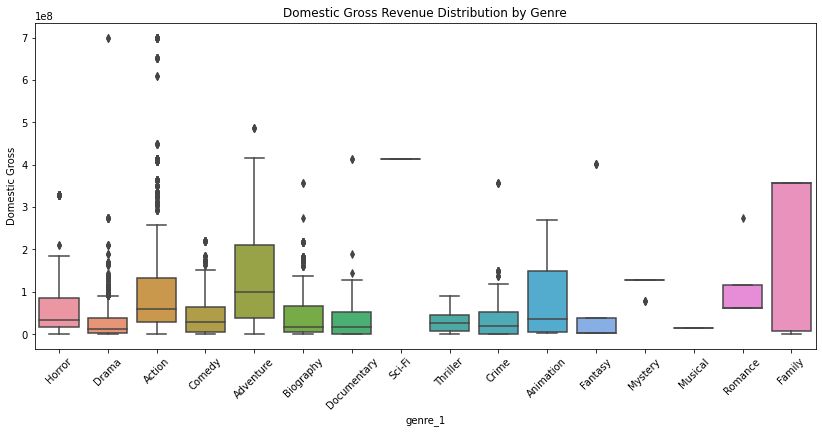

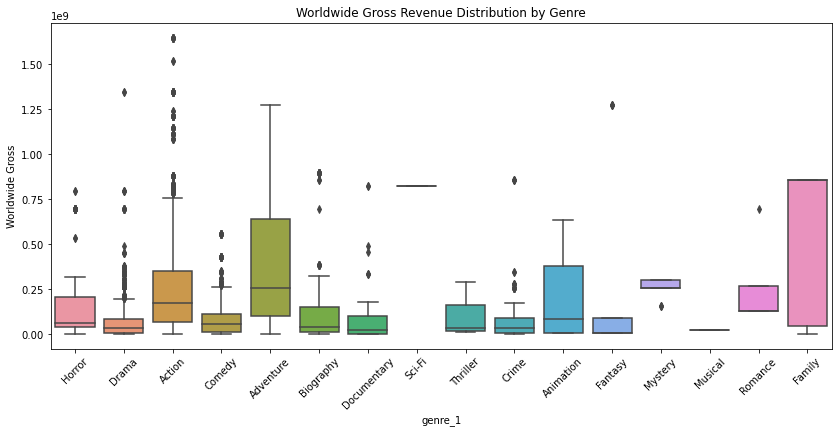

In [59]:
# Plot box plots for domestic and worldwide gross by genre
plt.figure(figsize=(14, 6))
sns.boxplot(data=all_movies, x='genre_1', y='domestic_gross_y')
plt.xticks(rotation=45)
plt.title('Domestic Gross Revenue Distribution by Genre')
plt.ylabel('Domestic Gross')


plt.figure(figsize=(14, 6))
sns.boxplot(data=all_movies, x='genre_1', y='worldwide_gross')
plt.xticks(rotation=45)
plt.title('Worldwide Gross Revenue Distribution by Genre')
plt.ylabel('Worldwide Gross')

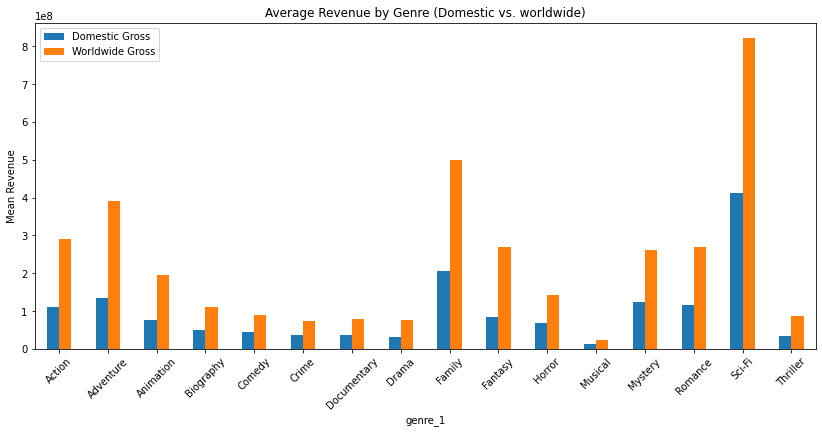

In [60]:
# Calculate mean revenue by genre for domestic and worldwide markets
mean_revenue = all_movies.groupby('genre_1')[['domestic_gross_y', 'worldwide_gross']].mean().reset_index()

# Plot bar chart for mean revenue
mean_revenue.plot(x='genre_1', kind='bar', figsize=(14, 6))
plt.title('Average Revenue by Genre (Domestic vs. worldwide)')
plt.ylabel('Mean Revenue')
plt.xticks(rotation=45)
plt.legend(['Domestic Gross', 'Worldwide Gross'])
plt.show()

**Conduct an ANOVA test to see if there is a significant difference in mean revenues between genres.**
> An ANOVA test (Analysis of Variance) is chosen  because we want to determine whether there are statistically significant differences in mean revenue across multiple film genres.

In [61]:
# Define the formula for domestic ANOVA
formula1 = 'domestic_gross_y ~ C(genre_1)'

# Define the formula for worldwide ANOVA
formula2 = 'worldwide_gross ~ C(genre_1)'

# Fit the model
lm = ols(formula1, data=all_movies).fit()
lm1= ols(formula2, data=all_movies).fit()

# Perform ANOVA
domestic_table = sm.stats.anova_lm(lm, typ=2)
worldwide_table=sm.stats.anova_lm(lm1,typ=2)

# Print the results
print("Domestic Revenue ANOVA:")
print(domestic_table)

print("\nWorldwide Revenue ANOVA:")
print(worldwide_table)

Domestic Revenue ANOVA:
                  sum_sq      df          F         PR(>F)
C(genre_1)  8.966205e+18    15.0  65.343685  2.187636e-184
Residual    5.616712e+19  6140.0        NaN            NaN

Worldwide Revenue ANOVA:
                  sum_sq      df          F         PR(>F)
C(genre_1)  8.041542e+19    15.0  88.906028  3.010459e-248
Residual    3.702416e+20  6140.0        NaN            NaN


**Observation**
> The ANOVA results show that both domestic revenue and worldwide revenue are significantly influenced by genre, with very high F-statistics and extremely low p-values
> There is a significant difference in the performance of films across different genres, both in terms of domestic and international revenue, hence we **reject the null hypothesis**

**Identify the movie studios that consistently produce high-performing films.**

* Null Hypothesis: There is no significant difference in the performance (domestic and worldwide gross) of films produced by different studios.
* Alternative Hypothesis: There is a significant difference in the performance (domestic and worldwide gross) of films produced by different studios.

In [62]:
# Calculate mean revenue across domestic and worldwide gross for each studio
studio_performance = all_movies.groupby('studio')[['domestic_gross_y', 'worldwide_gross']].mean()

# Top studios by average worldwide gross
top_studios = studio_performance.sort_values(by='worldwide_gross', ascending=False)
print(top_studios.head())

# Rank studios based on their worldwide gross
studio_ranking = studio_performance.sort_values(by='worldwide_gross', ascending=False)
studio_ranking['Rank'] = range(1, len(studio_ranking) + 1)

# Show the top studios by worldwide revenue
print(studio_ranking[['domestic_gross_y','worldwide_gross', 'Rank']].head())


        domestic_gross_y  worldwide_gross
studio                                   
BV          2.569859e+08     6.872563e+08
P/DW        1.554544e+08     5.349882e+08
WB          1.308793e+08     3.109045e+08
Fox         1.118169e+08     3.019369e+08
UTV         1.239176e+07     2.946546e+08
        domestic_gross_y  worldwide_gross  Rank
studio                                         
BV          2.569859e+08     6.872563e+08     1
P/DW        1.554544e+08     5.349882e+08     2
WB          1.308793e+08     3.109045e+08     3
Fox         1.118169e+08     3.019369e+08     4
UTV         1.239176e+07     2.946546e+08     5


In [63]:
# Calculate the variance for each studio's revenue
studio_variance = all_movies.groupby('studio')[['domestic_gross_y', 'worldwide_gross']].var()

# Combine performance with variance to find consistently high-performing studios
performance_with_variance = pd.merge(studio_performance, studio_variance, on='studio', suffixes=('_mean', '_variance'))

# Filter studios that perform well and have low variance
consistent_studios = performance_with_variance[(performance_with_variance['worldwide_gross_mean'] > performance_with_variance['worldwide_gross_mean'].median()) & 
                                               (performance_with_variance['worldwide_gross_variance'] < performance_with_variance['worldwide_gross_variance'].median())]

# Sort by worldwide gross mean
consistent_studios_sorted = consistent_studios.sort_values(by='worldwide_gross_mean', ascending=False)
print(consistent_studios_sorted[['domestic_gross_y_mean', 'worldwide_gross_mean']].head())


           domestic_gross_y_mean  worldwide_gross_mean
studio                                                
UTV                   12391761.0           294654618.0
MGM                   50269859.0            65967750.0
CJ                     1022720.0            49196532.0
CE                    15160801.0            17920013.0
Cleopatra                82703.0            17382693.0


> one-way ANOVA tests was done to see if differences in revenue between studios are significant

In [64]:
# Define the formula for domestic ANOVA
formula1 = 'domestic_gross_y ~ C(studio)'

# Define the formula for worldwide ANOVA
formula2 = 'worldwide_gross ~ C(studio)'

# Fit the model
lm = ols(formula1, data=all_movies).fit()
lm1= ols(formula2, data=all_movies).fit()

# Perform ANOVA
domestic_table = sm.stats.anova_lm(lm, typ=2)
worldwide_table=sm.stats.anova_lm(lm1,typ=2)

# Print the results
print("Domestic Revenue ANOVA:")
print(domestic_table)

print("\nWorldwide Revenue ANOVA:")
print(worldwide_table)

Domestic Revenue ANOVA:
                 sum_sq      df        F  PR(>F)
C(studio)  2.509491e+19    79.0  48.2664     0.0
Residual   4.004739e+19  6085.0      NaN     NaN

Worldwide Revenue ANOVA:
                 sum_sq      df          F  PR(>F)
C(studio)  1.792354e+20    79.0  50.846153     0.0
Residual   2.715183e+20  6085.0        NaN     NaN


**Observation**
>Both p-values are 0, which is much less than 0.05, hence we **reject the null hypothesis**
>The F-statistics are also relatively high (48.27 for domestic and 50.85 for worldwide), suggesting that the variation between studios is much greater than the variation within each studio


**Investigate the correlation between production budgets and both domestic and international revenues.**

* Null Hypothesis: The production budget does not significantly affect the revenue
* Alternative Hypothesis: The production budget has an impact on the revenue generated by films.

> Pearson correlation Test was used.This test is used to evaluate the strength and direction of the linear relationship between two continuous variables.

In [65]:
from scipy.stats import pearsonr

# Calculate Pearson correlation for domestic revenue and production budget
domestic_corr, p_value_domestic = stats.pearsonr(all_movies['production_budget'], all_movies['domestic_gross_y'])

# Calculate Pearson correlation for worldwide revenue and production budget
worldwide_corr, p_value_worldwide = stats.pearsonr(all_movies['production_budget'], all_movies['worldwide_gross'])

# Print the Pearson correlation coefficients and p-values
print(f"Pearson Correlation for Domestic Revenue: {domestic_corr}")
print(f"P-value for Domestic Revenue: {p_value_domestic}")
print(f"Pearson Correlation for Worldwide Revenue: {worldwide_corr}")
print(f"P-value for Worldwide Revenue: {p_value_worldwide}")


Pearson Correlation for Domestic Revenue: 0.6430501272843916
P-value for Domestic Revenue: 0.0
Pearson Correlation for Worldwide Revenue: 0.7240129917036979
P-value for Worldwide Revenue: 0.0


**Observation**
* The positive correlation value of 0.643 indicates a moderate positive relationship between the production budget and domestic revenue. This means that, in general, as the production budget increases, domestic revenue also tends to increase
* The positive correlation of 0.724 indicates a strong positive relationship between the production budget and worldwide revenue. This suggests that movies with higher production budgets are more likely to generate higher worldwide revenue.
* P_value=0; **reject the null hypothesis**. We can onclude that there is a statistically significant positive relationship between production budgets and both domestic and worldwide revenues.

**Assess the impact of a film's popularity score and average rating on its overall performance.**

* Null Hypothesis (H₀): Popularity and average rating do not significantly impact film performance (either domestic or worldwide gross).
* Alternative Hypothesis (H₁): Popularity and/or average rating significantly impact film performance.

In [66]:
# Calculate Pearson correlation between popularity score, average rating, and revenue
popularity_corr_domestic, p_value_popularity_domestic = stats.pearsonr(all_movies['popularity'], all_movies['domestic_gross_y'])
rating_corr_domestic, p_value_rating_domestic = stats.pearsonr(all_movies['averagerating'], all_movies['domestic_gross_y'])

popularity_corr_worldwide, p_value_popularity_worldwide = stats.pearsonr(all_movies['popularity'], all_movies['worldwide_gross'])
rating_corr_worldwide, p_value_rating_worldwide = stats.pearsonr(all_movies['averagerating'], all_movies['worldwide_gross'])

# Print the correlation coefficients and p-values
print(f"Pearson Correlation for Popularity and Domestic Revenue: {popularity_corr_domestic}")
print(f"P-value for Popularity and Domestic Revenue: {p_value_popularity_domestic}")

print(f"Pearson Correlation for Rating and Domestic Revenue: {rating_corr_domestic}")
print(f"P-value for Rating and Domestic Revenue: {p_value_rating_domestic}")

print(f"Pearson Correlation for Popularity and Worldwide Revenue: {popularity_corr_worldwide}")
print(f"P-value for Popularity and Worldwide Revenue: {p_value_popularity_worldwide}")

print(f"Pearson Correlation for Rating and Worldwide Revenue: {rating_corr_worldwide}")
print(f"P-value for Rating and Worldwide Revenue: {p_value_rating_worldwide}")


Pearson Correlation for Popularity and Domestic Revenue: 0.4080738903748899
P-value for Popularity and Domestic Revenue: 4.241680326248973e-246
Pearson Correlation for Rating and Domestic Revenue: 0.24544113380649546
P-value for Rating and Domestic Revenue: 2.922895870228934e-85
Pearson Correlation for Popularity and Worldwide Revenue: 0.4558935987092533
P-value for Popularity and Worldwide Revenue: 3.480232549e-314
Pearson Correlation for Rating and Worldwide Revenue: 0.24258389139478093
P-value for Rating and Worldwide Revenue: 2.851843387531689e-83


**Observation**
> Since the p-values for all correlations are much less than 0.05, we can **reject the null hypothesis** and conclude that both popularity and average rating have a significant impact on the revenue (both domestic and worldwide).

> Further analysis was done by performing a regression analysis to quantify the exact impact of these variables on revenue

In [67]:
# formula for regression with popularity and rating as predictors
formula = 'domestic_gross_y ~ popularity + averagerating'

# Fit the linear regression model
lm = ols(formula, data=all_movies).fit()

# Print the summary of the regression model
print(lm.summary())

# Define the formula for worldwide revenue regression
formula2 = 'worldwide_gross ~ popularity + averagerating'

# Fit the linear regression model for worldwide gross
lm2 = ols(formula2, data=all_movies).fit()

# Print the summary of the regression model for worldwide revenue
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:       domestic_gross_y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     717.4
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          7.85e-281
Time:                        11:46:41   Log-Likelihood:            -1.2184e+05
No. Observations:                6165   AIC:                         2.437e+05
Df Residuals:                    6162   BIC:                         2.437e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -9.07e+07   8.22e+06    -11.028

**Observation**
* Both popularity and average rating have a statistically significant positive relationship with both domestic and worldwide revenue.
* Popularity has a stronger effect on worldwide revenue than on domestic revenue, while average rating has a stronger effect on domestic revenue compared to worldwide revenue.
* The low R-squared values (around 19% and 23%) suggest that while popularity and average rating are important factors, there are other variables that also influence revenue that are not captured in the models.

## Model Evaluation and Performance Metrics

#### Examine trends in movie revenues over time

Slope (trend per year): 0.0
Intercept: -15152294139.644688
R-squared: 0.012252467387202093
Predicted movie counts for future years: [2.74569165e+08 3.12660186e+08 3.50751206e+08]


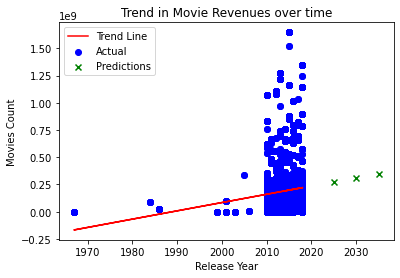

Worldwide Gross Regression Results:
                             OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     76.45
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.88e-18
Time:                        11:46:41   Log-Likelihood:            -1.2841e+05
No. Observations:                6165   AIC:                         2.568e+05
Df Residuals:                    6163   BIC:                         2.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const      

In [68]:
# Convert year from object to float
all_movies['release_year'] = pd.to_numeric(all_movies['release_year'], errors='coerce')

# Creating a release_year column
all_movies['release_year']=all_movies['release_date_y'].dt.year

# Drop the null values
all_movies = all_movies.dropna(subset=['release_year', 'worldwide_gross'])

# independent variable (year) and add a constant
X = sm.add_constant(all_movies['release_year'])

# Year vs Worldwide gross
y_worldwide = all_movies['worldwide_gross']

# Create and fit the model
model = LinearRegression()
model.fit(X, y_worldwide)

# Examine the trend
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (trend per year): {slope}")
print(f"Intercept: {intercept}")

# R-squared
r_squared = model.score(X, y_worldwide)
print(f"R-squared: {r_squared}")

# Fit the OLS Regression model
worldwide_model = sm.OLS(y_worldwide, X).fit()

# Predict future production
future_years = np.array([[2025], [2030], [2035]]).reshape(-1, 1)
future_years_with_constant = sm.add_constant(future_years)
future_predictions = model.predict(future_years_with_constant)
print("Predicted movie counts for future years:", future_predictions)

# Plot the domestic results
plt.scatter(all_movies['release_year'], all_movies['worldwide_gross'], color='blue', label='Actual')
plt.plot(all_movies['release_year'], model.predict(X), color='red', label='Trend Line')

# Scatterplot of the Predictions
plt.scatter(future_years, future_predictions, color='green', marker='x', label='Predictions')
plt.xlabel("Release Year")
plt.ylabel("Movies Count")
plt.title("Trend in Movie Revenues over time")
plt.legend()
plt.show()

# Output the summary of the model
print("Worldwide Gross Regression Results:\n", worldwide_model.summary())


# Interpret the p-values for 'year' coefficient in both models
if worldwide_model.pvalues['release_year'] < 0.05:
    print("There is a significant trend in domestic gross revenue over the years.")
else:
    print("No significant trend in domestic gross revenue over the years.")


**Observation**
 > The release_year coefficient is statistically significant with a p-value much less than 0.05, indicating a significant positive relationship between the release year and worldwide gross revenue.
The coefficient for release_year is 9.011e+06, suggesting that worldwide gross revenue has increased by approximately 9 million each year, on average
> The R-squared value is 0.019, which indicates that the release_year alone explains only about 1.9% of the variance in worldwide gross revenue. This suggests that there are likely other factors that are more influential in determining worldwide gross.


### Trend in Film Production Over Time

Slope (trend per year): 18.336742857142863
Intercept: -36393.89331428572
R-squared: 0.5199978224026296
Predicted movie counts for future years: [738.01097143 829.69468571 921.3784    ]


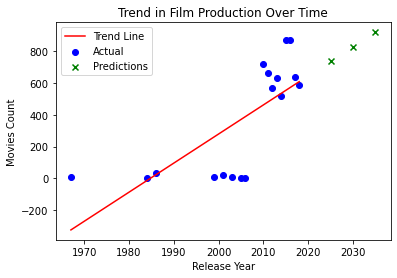

                            OLS Regression Results                            
Dep. Variable:           movies_count   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     16.25
Date:                Fri, 15 Nov 2024   Prob (F-statistic):            0.00109
Time:                        11:46:41   Log-Likelihood:                -117.11
No. Observations:                  17   AIC:                             238.2
Df Residuals:                      15   BIC:                             239.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.639e+04   9118.421     -3.991   

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [69]:
# Number of movies per year
movies_per_year = all_movies['release_year'].value_counts().sort_index()

# Step 2: Convert movies_per_year to DataFrame for regression
movies_per_year_df = movies_per_year.reset_index()
movies_per_year_df.columns = ['release_year', 'movies_count'] 

# Step 3: Define independent variable (X) and dependent variable (y)
X = movies_per_year_df['release_year']
y = movies_per_year_df['movies_count']

# Add a constant for the OLS model only
X_with_const = sm.add_constant(X) 

# Create and fit the model
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# Examine the trend
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (trend per year): {slope}")
print(f"Intercept: {intercept}")

# R-squared
r_squared = model.score(X.values.reshape(-1, 1), y)
print(f"R-squared: {r_squared}")

# Predict future production
future_years = np.array([[2025], [2030], [2035]]).reshape(-1, 1)
#future_years_with_constant = sm.add_constant(future_years)
future_predictions = model.predict(future_years)
print("Predicted movie counts for future years:", future_predictions)

# Plot the results
plt.scatter(movies_per_year_df['release_year'], movies_per_year_df['movies_count'], color='blue', label='Actual')
plt.plot(movies_per_year_df['release_year'], model.predict(X.values.reshape(-1, 1)), color='red', label='Trend Line')
plt.scatter(future_years, future_predictions, color='green', marker='x', label='Predictions')
plt.xlabel("Release Year")
plt.ylabel("Movies Count")
plt.title("Trend in Film Production Over Time")
plt.legend()
plt.show()

# Step 4: Fit the OLS regression model
model = sm.OLS(y, X_with_const).fit()

# Step 5: Output the summary of the model
print(model.summary())

**Observation**
> The regression model provides insights into trends in film production over time. 

* Slope (15.39): On average, the count of movies produced each year increases by about 15.39 units per year.
* R-squared (0.53): Approximately 53% of the variance in movie production counts is explained by the year alone, indicating a moderate linear trend.



## Conclusion and Insights

From the analysis of movie performance in relation to factors such as genre, studio, production budget, popularity, and ratings, several key insights can be drawn:

1. Significant Impact of Genre on Revenue:

The analysis reveals that genre plays a significant role in determining both domestic and worldwide revenue. The test confirm that the performance of films varies significantly across different genres.

Insight: Studios and producers can use genre trends to guide their investment decisions. Genres like Classics tend to have higher revenues, while others may not perform as well. Targeting popular or profitable genres could enhance revenue potential.

2. Studio Performance:

The differences in revenue performance between studios are highly significant, with some studios consistently outpacing others in both domestic and international markets.

Insight: Studios like BV, Fox, and WB lead in terms of revenue, indicating their robust production, marketing, and distribution strategies. New or smaller studios should analyze the strategies of these top performers to improve their own business operations. Understanding what makes top-performing studios successful could be a key to achieving similar results.

3. Production Budget’s Positive Impact on Revenue:

There is a moderate positive correlation between production budgets and both domestic and worldwide revenue.

Insight: Larger production budgets generally lead to higher revenue, both domestically and internationally. However, it is essential to optimize the allocation of the production budget, ensuring that spending contributes effectively to key areas such as talent, marketing, and production quality. A higher budget doesn’t guarantee success, but it increases the likelihood of better returns.

4. Popularity and Rating Influence:

Popularity has significant positive correlation with movie revenues. A movie’s popularity  directly affect its box office performance, with higher popularity leading to better financial outcomes. The correlation between average rating and both gross earnings (domestic and worldwide) is weak, which suggests that ratings do not strongly predict earnings.

Insight: Enhancing the visibility and appeal of a film through effective marketing, star power, and creating quality content that resonates with audiences can significantly improve revenue outcomes. Studios should prioritize building a strong fanbase and ensuring high ratings from critics and audiences alike, as these factors have a proven impact on both domestic and international earnings.
